In [19]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv('./data_root/dataset_for_report.csv')

In [21]:
df

,Unnamed: 0,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,IMC,Triglycerides,Sleep Hours Per Day,Country,Heart Attack Risk,is_Male,Systolic,Diastolic,Heart Rate Group
0,0,67,208,72,0,0,1,0,0,4.168189,...,261404,31.251233,286,6,Argentina,0,1,158,88,High
1,1,21,389,98,1,1,1,1,1,1.813242,...,285768,27.194973,235,7,Canada,0,1,165,93,Very High
2,2,21,324,72,1,0,0,0,0,2.078353,...,235282,28.176571,587,4,France,0,0,174,99,High
3,3,84,383,73,1,1,1,0,1,9.828130,...,125640,36.464704,378,4,Canada,0,1,163,100,High
4,4,66,318,93,1,1,1,1,0,5.804299,...,160555,21.809144,231,5,Thailand,0,1,91,88,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,60,121,61,1,1,1,0,1,7.917342,...,235420,19.655895,67,7,Thailand,0,1,94,76,Normal
8759,8759,28,120,73,1,0,0,1,0,16.558426,...,217881,23.993866,617,9,Canada,0,0,157,102,High
8760,8760,47,250,105,0,1,1,1,1,3.148438,...,36998,35.406146,527,4,Brazil,1,1,161,75,Very High
8761,8761,36,178,60,1,0,1,0,0,3.789950,...,209943,27.294020,114,8,Brazil,0,1,119,67,Normal


<Axes: >

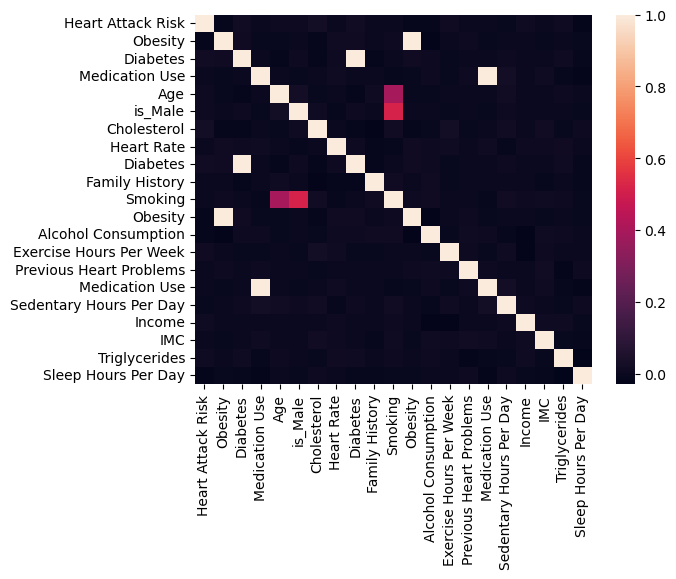

In [22]:
import seaborn as sns

sns.heatmap(df[['Heart Attack Risk','Obesity','Diabetes', 'Medication Use','Age', 
                'is_Male','Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week','Previous Heart Problems',
       'Medication Use', 'Sedentary Hours Per Day', 'Income',
       'IMC', 'Triglycerides',
       'Sleep Hours Per Day',]].corr())

#Heatmap para identicar melhor os dados e outliers

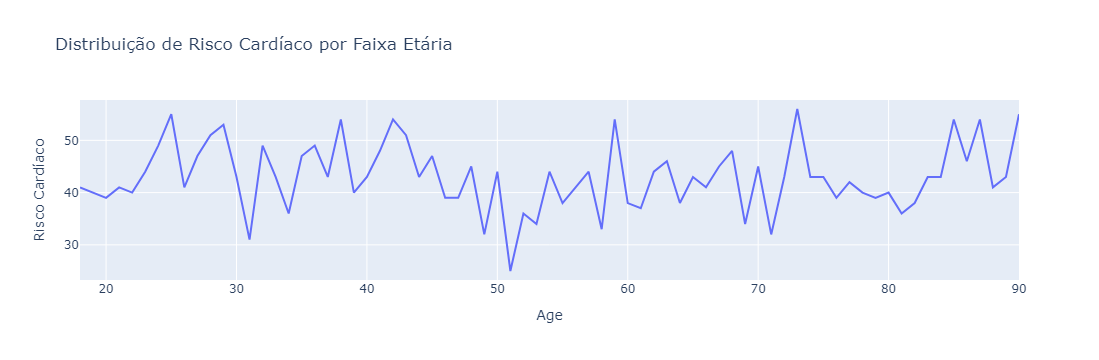

In [23]:
grouped_data = df.groupby('Age')['Heart Attack Risk'].sum().reset_index()

fig = px.line(
    grouped_data, 
    x='Age', 
    y='Heart Attack Risk', 
    labels={'Age Group': 'Faixa Etária', 'Heart Attack Risk': 'Risco Cardíaco'},
    title='Distribuição de Risco Cardíaco por Faixa Etária'
)

# Exibir o gráfico
fig.show()


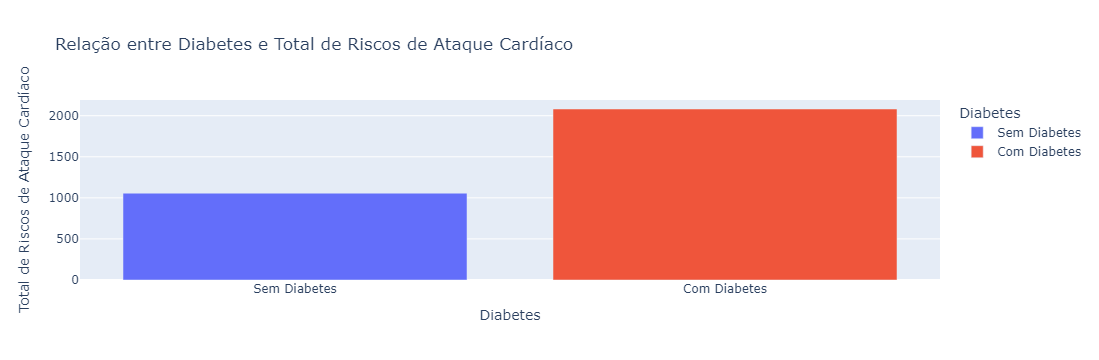

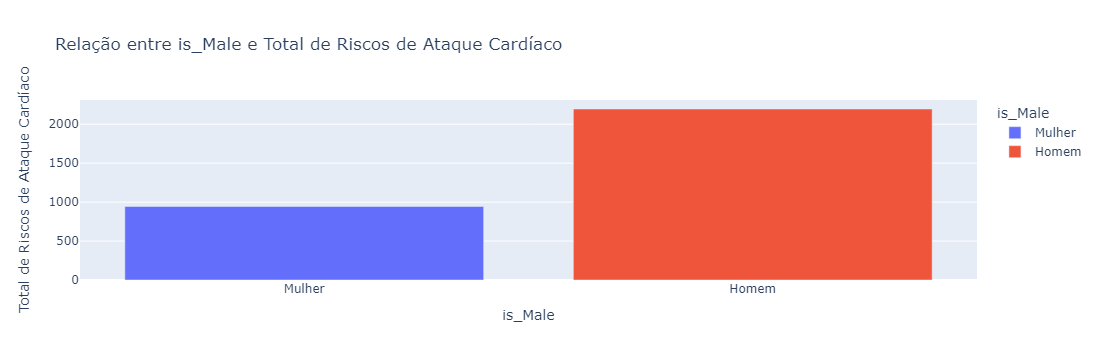

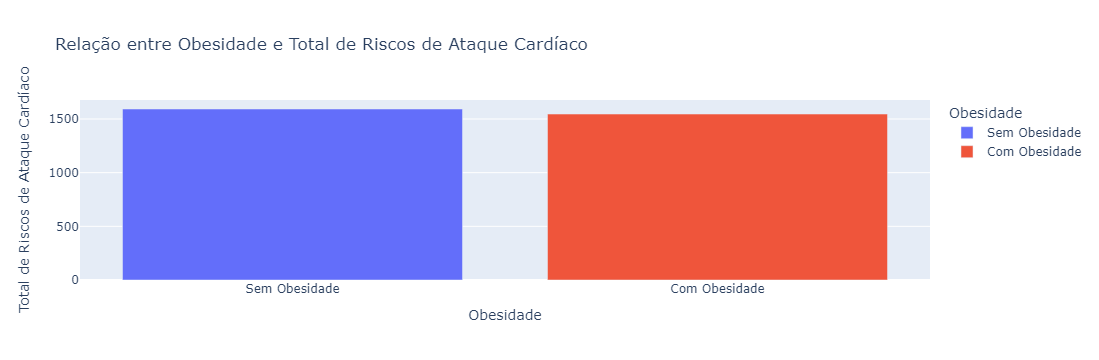

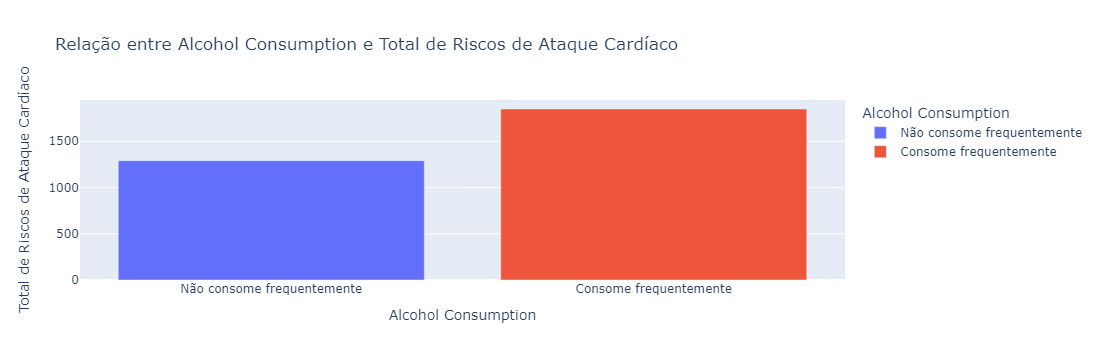

In [24]:
def plot_heart_risk_sum_by_condition(df, condition, condition_label, labels_dict):
    grouped = df.groupby(condition)['Heart Attack Risk'].sum().reset_index(name='Total Heart Attack Risk')
    
    grouped[condition] = grouped[condition].map(labels_dict)
    
    fig = px.bar(
        grouped,
        x=condition,
        color=condition,
        y='Total Heart Attack Risk',
        labels={
            condition: condition_label, 
            'Total Heart Attack Risk': 'Total de Riscos de Ataque Cardíaco'
        },
        title=f'Relação entre {condition_label} e Total de Riscos de Ataque Cardíaco'
    )
    fig.show()

# Dicionários de labels para 0 e 1 em cada condição
diabetes_labels = {0: 'Sem Diabetes', 1: 'Com Diabetes'}
obesity_labels = {0: 'Sem Obesidade', 1: 'Com Obesidade'}
medication_labels = {0: 'Sem Uso de Medicação', 1: 'Com Uso de Medicação'}
smoking_labels = {0: 'Não Fumante', 1: 'Fumante'}
familiar_labels = {0: 'Não tem historico', 1: 'Possui historico'}
gender_labels = {0: 'Mulher', 1: 'Homem'}
alcohol_labels = {0: 'Não consome frequentemente', 1: 'Consome frequentemente'}

# Gerando gráficos para cada condição com suas labels
plot_heart_risk_sum_by_condition(df, 'Diabetes', 'Diabetes', diabetes_labels)
plot_heart_risk_sum_by_condition(df, 'is_Male', 'is_Male', gender_labels)
plot_heart_risk_sum_by_condition(df, 'Obesity', 'Obesidade', obesity_labels)
plot_heart_risk_sum_by_condition(df, 'Alcohol Consumption', 'Alcohol Consumption', alcohol_labels)


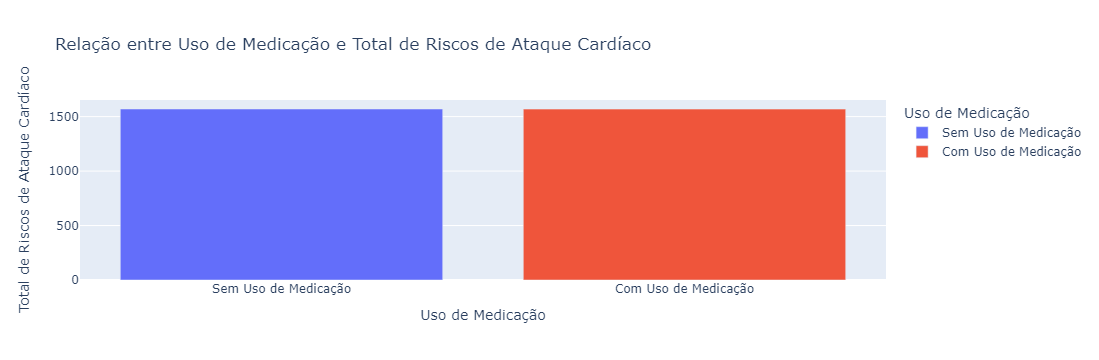

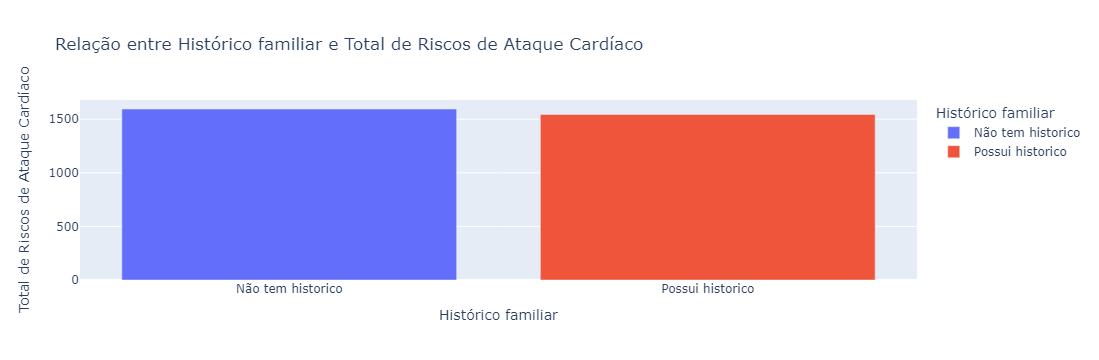

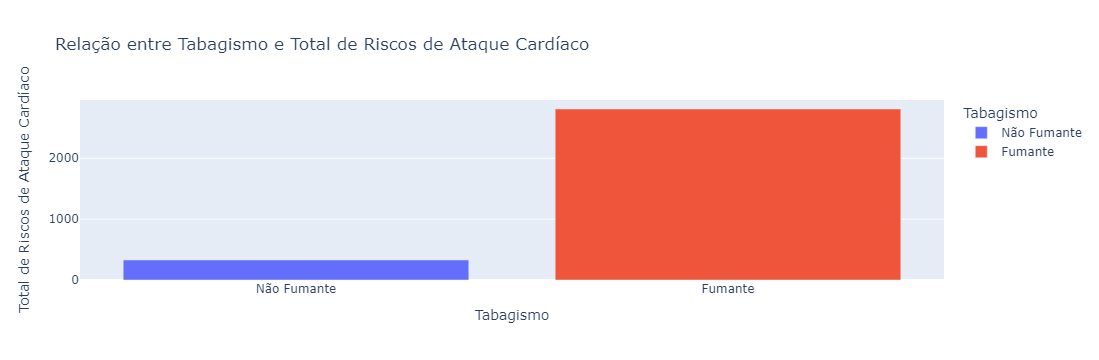

In [25]:
plot_heart_risk_sum_by_condition(df, 'Medication Use', 'Uso de Medicação', medication_labels)
plot_heart_risk_sum_by_condition(df, 'Family History', 'Histórico familiar', familiar_labels)
plot_heart_risk_sum_by_condition(df, 'Smoking', 'Tabagismo', smoking_labels)

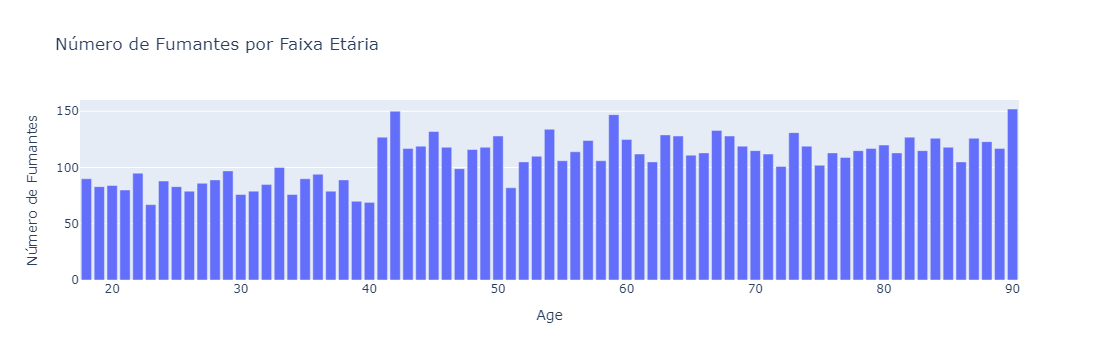

In [26]:
grouped_smoking = df.groupby('Age')['Smoking'].sum().reset_index()

fig = px.bar(grouped_smoking, 
             x='Age', 
             y='Smoking', 
             title='Número de Fumantes por Faixa Etária', 
             labels={'Age Group': 'Faixa Etária', 'Smoking': 'Número de Fumantes'})

fig.show()


### Podemos observar que:
Os gráficos revelam que as faixas etárias entre 25-30 anos e 60-70 anos apresentam maior risco de ataque cardíaco. Embora o risco aumente com a idade, especialmente após os 60 anos, pessoas mais jovens também estão expostas a esses riscos, principalmente devido a comportamentos como o tabagismo e o consumo excessivo de álcool. O tabagismo, em particular, se destaca como um fator de risco significativo, com a maioria das pessoas com risco de ataque cardíaco sendo fumantes. 

Além disso, a diabetes surge como uma das condições mais associadas ao risco de ataque cardíaco. A maioria das pessoas com risco cardiovascular também apresenta diabetes, o que indica que níveis elevados de glicose no sangue contribuem para a formação de placas nas artérias, favorecendo o desenvolvimento de aterosclerose. A diabetes também está ligada a problemas metabólicos, como o aumento de triglicerídeos, o que agrava ainda mais o risco de doenças cardíacas. Assim, o controle da glicemia é crucial para a prevenção de complicações cardiovasculares.

Embora a obesidade e o histórico familiar sejam fatores de risco conhecidos para doenças cardíacas, os dados deste estudo não mostram uma correlação tão forte com o risco de ataque cardíaco. Isso pode ser devido à forma como os dados foram coletados, possivelmente envolvendo uma amostra que não possuía informações completas sobre histórico familiar. Os homens, em particular, são os mais afetados por essas condições e frequentemente estão entre os que mais consomem álcool, o que também contribui para o risco cardiovascular. O alcoolismo, assim como o tabagismo, é um fator relevante, pois o consumo excessivo de álcool pode aumentar a pressão arterial e os níveis de triglicerídeos, que vamos ver aqui pra frente, além de prejudicar o músculo cardíaco.

C:\Users\gabri\AppData\Local\Temp\ipykernel_16436\2893271593.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



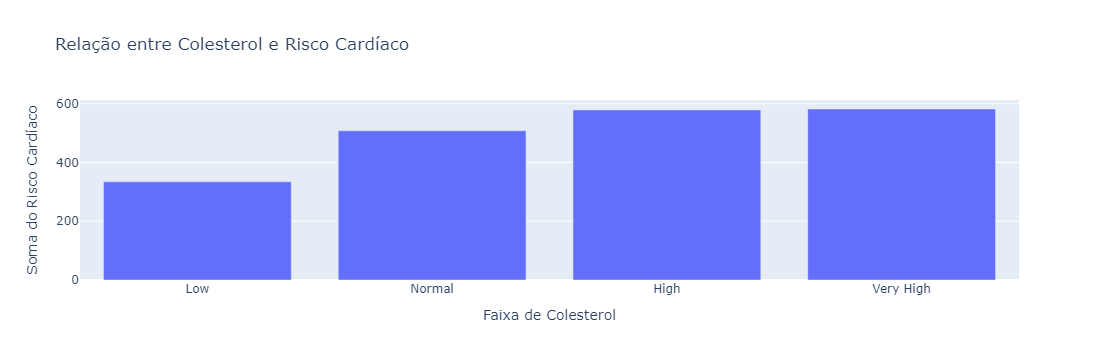

In [27]:
bins = [0, 150, 200, 250, 300] 
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna com as faixas de colesterol
df['Cholesterol Group'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de colesterol e somar o risco de ataque cardíaco
cholesterol_risk = df.groupby('Cholesterol Group')['Heart Attack Risk'].sum().reset_index()

fig = px.bar(cholesterol_risk, x='Cholesterol Group', y='Heart Attack Risk',
             labels={'Cholesterol Group': 'Faixa de Colesterol', 'Heart Attack Risk': 'Soma do Risco Cardíaco'},
             title='Relação entre Colesterol e Risco Cardíaco')

fig.show()

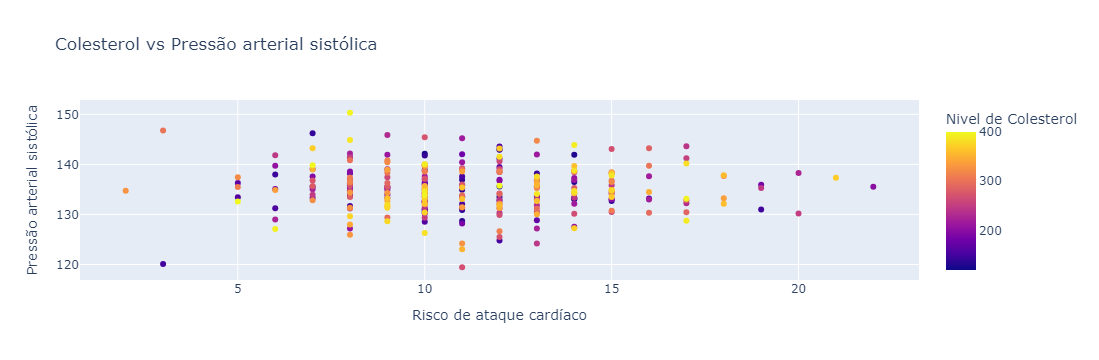

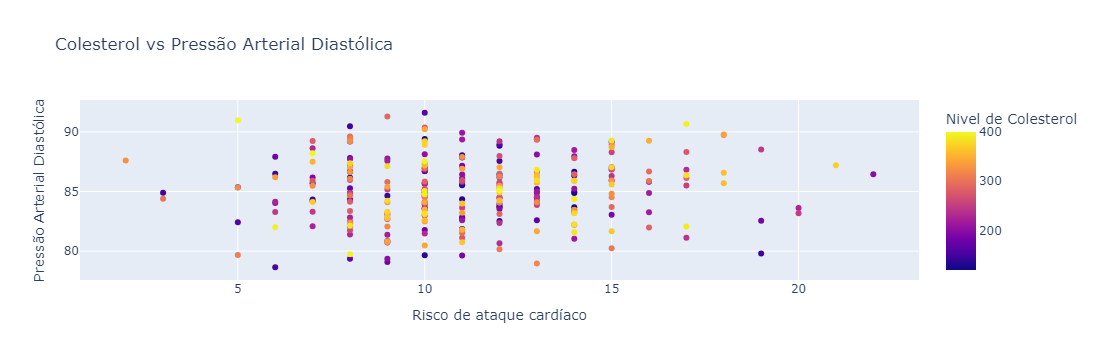

In [28]:
cholesterol_risk = df.groupby('Cholesterol').agg({
    'Systolic': 'mean', 
    'Diastolic': 'mean',  
    'Heart Attack Risk': 'sum' 
}).reset_index()

# Gráfico de dispersão para Cholesterol vs Systolic Pressure
fig1 = px.scatter(cholesterol_risk, x='Heart Attack Risk', y='Systolic',
                   color='Cholesterol', 
                  labels={'Cholesterol': 'Nivel de Colesterol', 'Systolic': 'Pressão arterial sistólica', 'Heart Attack Risk': 'Risco de ataque cardíaco'},
                  title='Colesterol vs Pressão arterial sistólica')

# Gráfico de dispersão para Cholesterol vs Diastolic Pressure
fig2 = px.scatter(cholesterol_risk, x='Heart Attack Risk', y='Diastolic',
                    color='Cholesterol', 
                  labels={'Cholesterol': 'Nivel de Colesterol', 'Diastolic': 'Pressão Arterial Diastólica', 'Heart Attack Risk': 'Risco de ataque cardíaco'},
                  title='Colesterol vs Pressão Arterial Diastólica')

fig1.show()
fig2.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_16436\3166570976.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



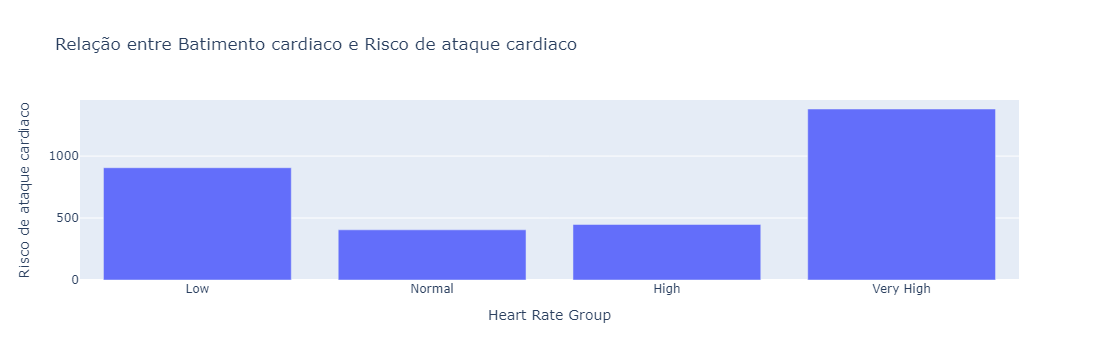

In [29]:
bins = [0, 60, 70, 80, 150]  
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna para a faixa de frequência cardíaca
df['Heart Rate Group'] = pd.cut(df['Heart Rate'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de frequência cardíaca e somar o risco de ataque cardíaco
heart_rate_risk = df.groupby('Heart Rate Group')['Heart Attack Risk'].sum().reset_index()
fig = px.bar(heart_rate_risk, 
             x='Heart Rate Group', 
             y='Heart Attack Risk',
             labels={'Heart Rate Group': 'Heart Rate Group', 'Heart Attack Risk': 'Risco de ataque cardiaco'},
             title='Relação entre Batimento cardiaco e Risco de ataque cardiaco')

fig.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_16436\2976577507.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



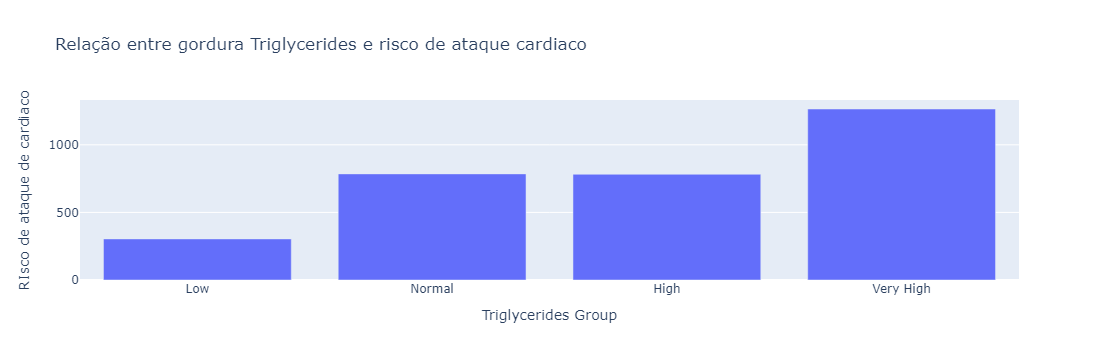

In [30]:
bins = [0, 100, 300, 500, 800]  
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna para a faixa de frequência cardíaca
df['Triglycerides Group'] = pd.cut(df['Triglycerides'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de frequência cardíaca e somar o risco de ataque cardíaco
heart_rate_risk = df.groupby('Triglycerides Group')['Heart Attack Risk'].sum().reset_index()
fig = px.bar(heart_rate_risk, 
             x='Triglycerides Group', 
             y='Heart Attack Risk',
             labels={'Triglycerides Group': 'Triglycerides Group', 'Heart Attack Risk': 'RIsco de ataque de cardiaco'},
             title='Relação entre gordura Triglycerides e risco de ataque cardiaco')

fig.show()

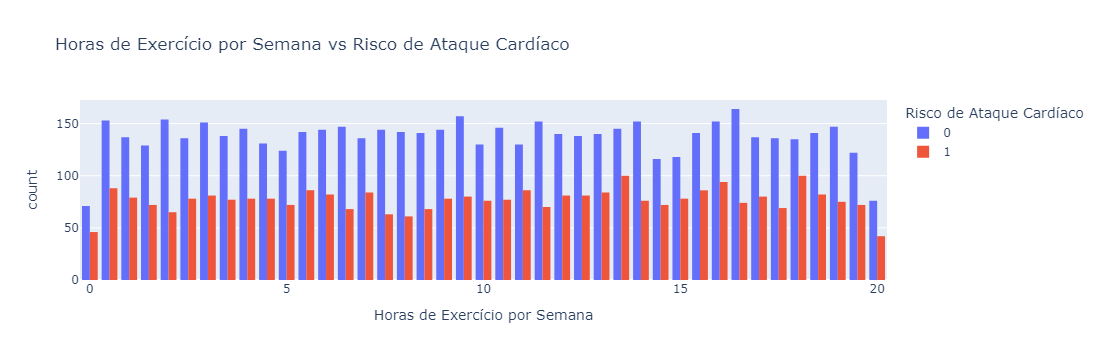

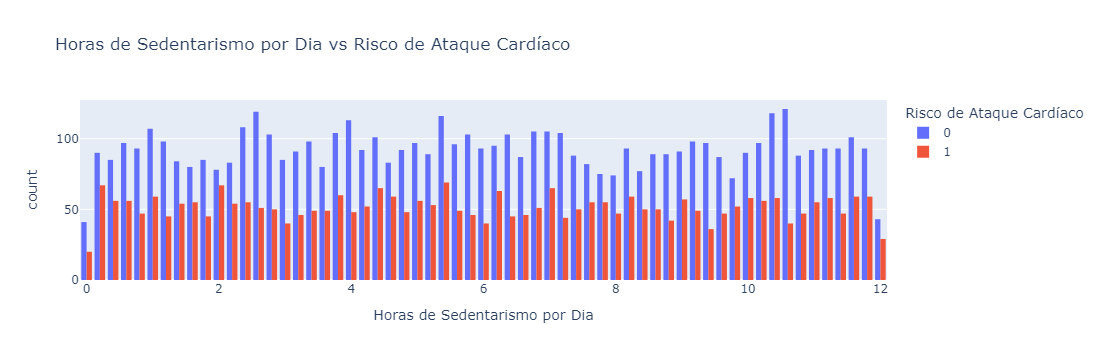

In [31]:
fig1 = px.histogram(df, x='Exercise Hours Per Week', color='Heart Attack Risk',
                    barmode='group',  # Grupos lado a lado
                    labels={'Exercise Hours Per Week': 'Horas de Exercício por Semana', 
                            'Heart Attack Risk': 'Risco de Ataque Cardíaco'},
                    title='Horas de Exercício por Semana vs Risco de Ataque Cardíaco',
                   )
fig2 = px.histogram(df, x='Sedentary Hours Per Day', color='Heart Attack Risk',
                    barmode='group',  # Grupos lado a lado
                    labels={'Sedentary Hours Per Day': 'Horas de Sedentarismo por Dia', 
                            'Heart Attack Risk': 'Risco de Ataque Cardíaco'},
                    title='Horas de Sedentarismo por Dia vs Risco de Ataque Cardíaco',
                   )
fig1.show()
fig2.show()

### Podemos ver que:
Podemos ver que o nivel de colesterol geralmente tem a ver com risco de ataque cardiaco. E a pressão sanguineo com corelação com o colesterol devido ao impacto que ambas têm na saúde dos vasos sanguíneos. A hipertensão pode causar danos às paredes das artérias, desencadeando uma resposta inflamatória que estimula o acúmulo de "colesterol ruim", nas áreas lesionadas, levando à formação de placas. Além disso, fatores comuns como resistência à insulina, obesidade e dieta pouco saudável podem elevar simultaneamente a pressão arterial e o colesterol, agravando o risco de doenças cardiovasculares. Assim, o desequilíbrio de um pode influenciar diretamente o outro.

Outros maus hábitos como podemos ver nos gráficos diminuem a chance de você ter ataque cardíaco como você nao ter tanto exercicios por semana ou muitas horas sedentárias principalmente. Mas não tem tanta relação, podemos observar apenas que geralmente o risco não aparece muito ou seja pode ser uma forma de prever.

Nos gráfico podemos analisar que o maior risco de ataque cardiaco está relacionado ao cardíacos muito baixos (bradicardia) ou muito altos (taquicardia) porque ambos indicam que o coração pode estar funcionando de forma ineficiente, comprometendo o fluxo sanguíneo adequado para o corpo e os próprios tecidos do coração. Outro fator são os níveis elevados de triglicerídeos que podemos ver no gráfico está fortemente associados a um maior risco de doenças cardíacas, incluindo ataques cardíacos. Quando os níveis de triglicerídeos são altos, pode ocorrer o acúmulo de gordura nas artérias, formando placas chamadas aterosclerose. Essas placas podem estreitar e obstruir as artérias, dificultando o fluxo sanguíneo e aumentando o risco de um bloqueio, que pode levar a um ataque cardíaco. Outro fator importante é que níveis elevados de triglicerídeos podem afetar os níveis de colesterol no sangue. O aumento de triglicerídeos pode reduzir o colesterol "bom" e aumentar o colesterol "ruim".

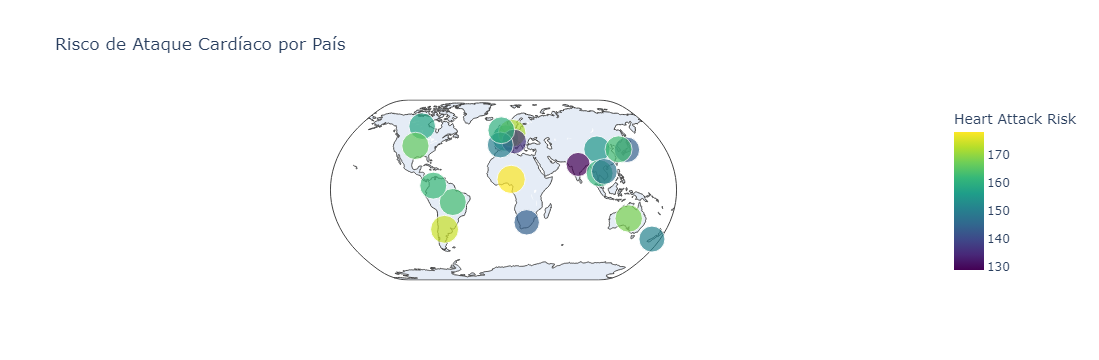

In [32]:
grouped_data = df.groupby('Country')['Heart Attack Risk'].sum().reset_index()

fig = px.scatter_geo(grouped_data, 
                     locations="Country",
                     color="Heart Attack Risk", 
                     size="Heart Attack Risk", 
                     hover_name="Country",
                     hover_data=["Heart Attack Risk"], 
                     title="Risco de Ataque Cardíaco por País",
                     color_continuous_scale="Viridis", 
                     projection="natural earth", 
                    locationmode="country names"
                    )

fig.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_16436\1117710102.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



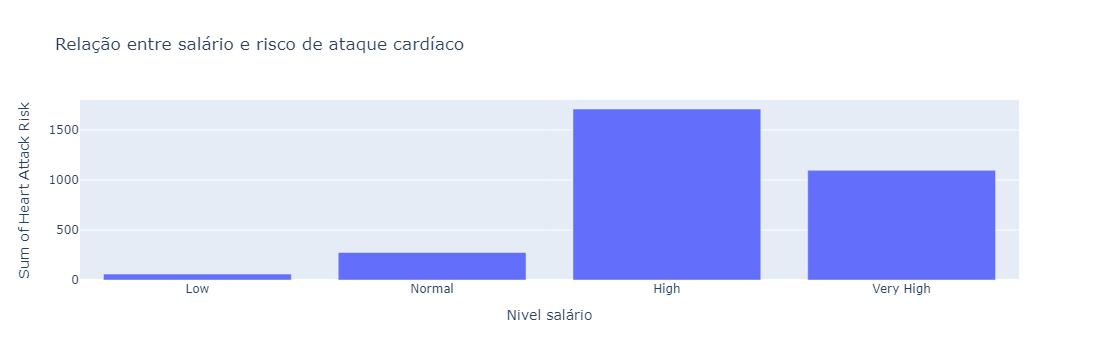

In [33]:
bins = [0, 25000, 50000, 200000, 300000]  
labels = ['Low', 'Normal', 'High', 'Very High'] 

# Criar uma nova coluna para a faixa de frequência cardíaca
df['Income Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# Agrupar pela faixa de frequência cardíaca e somar o risco de ataque cardíaco
heart_rate_risk = df.groupby('Income Group')['Heart Attack Risk'].sum().reset_index()
fig = px.bar(heart_rate_risk, 
             x='Income Group', 
             y='Heart Attack Risk',
             labels={'Income Group': 'Nivel salário', 'Heart Attack Risk': 'Sum of Heart Attack Risk'},
             title='Relação entre salário e risco de ataque cardíaco')

fig.show()

### Podemos ver que:
Os países mais afetados como 178 para a **Nigéria** e 174 para a **Argentina**. Isso sugere que em algumas regiões da África e da América Latina, fatores como falta de acesso a cuidados de saúde, hábitos alimentares inadequados e alta prevalência de condições como diabetes e hipertensão podem estar contribuindo significativamente para o aumento do risco de doenças cardíacas. Em países em desenvolvimento, as questões socioeconômicas também podem afetar a saúde cardiovascular, uma vez que há menos conscientização sobre a prevenção e menos acesso a tratamentos adequados

Por outro lado, países mais desenvolvidos como **Estados Unidos**, **Austrália**, **Reino Unido**, e **França** também apresentam números elevados, com valores como 166 para os Estados Unidos e 160 para o Reino Unido. O alto risco de ataque cardíaco nesses países pode estar relacionado a fatores como dietas ricas em gorduras saturadas, sedentarismo e consumo elevado de álcool. Em muitos desses países, apesar de um bom acesso a cuidados médicos, os estilos de vida modernos, caracterizados por longas horas de trabalho, alta ingestão de alimentos processados e baixo nível de atividade física, aumentam o risco cardiovascular. Além disso, condições como obesidade e diabetes são prevalentes, o que contribui diretamente para o aumento do risco de doenças do coração.

Países como **Brasil**, **Colômbia** e **Tailândia**, Nesses lugares, fatores como dieta desequilibrada, uso de substâncias como tabaco e álcool, além de sistemas de saúde nem sempre acessíveis, podem ser determinantes. Além disso, em muitos desses países, o envelhecimento da população, bem como o aumento de doenças como diabetes, hipertensão e colesterol alto, estão se tornando questões crescentes, colocando essas regiões em risco maior de complicações cardiovasculares. A falta de campanhas eficazes de conscientização sobre a saúde cardiovascular também pode ser um dos fatores que contribuem para esses números elevados



Outra coisa que analisamos foi o salário, que parece não ter muita relação pois afeta a classe mais alta e o uso do medicamento parece não ter afeito no risco do ataque cardíaco ou não foi documentado na base de dados após o uso ou o tempo de consumo.